<a href="https://colab.research.google.com/github/jude6649/Data-science-projects/blob/main/Project_102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.math import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
dataset='/content/drive/MyDrive/Happy or sad cnn.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extacted')

the dataset is extacted


In [ ]:
happy_face=os.listdir('/content/face_classification/happy_person_face') # create list contain files with mask
print(happy_face[:5])  # print the first five elements
print(happy_face[-5:]) # print the last five elements

['girl-smiling-happy-face-wallpaper-preview.jpg', 'wow-face-happy-asian-man-head-shot-wow-face-happy-man-head-shot-104264571.jpg', 'happy-man-laughs-human-emotions-avatar-with-happy-men-vector.jpg', '313625278.jpg', '284ee55f19e0b2574e5699935cfc1136.jpg']
['appy-face-human-emotion-expression-african-american-having-fun-joy-154266727.jpg', 'e-expressions-concept-happy-positive-cheerful-smiling-woman-with-blonde-hair.jpg', 'ul-silly-and-happiness-pose-dreaming-about-an-idea-with-backdrop-fit_400_400.jpg', 'images20.jpg', 'face-of-happy-man-icon-vector-10064867.jpg']


In [ ]:
sad_face=os.listdir('/content/face_classification/sad_person_face') # create list contain files without mask
print(sad_face[:5])  # print the first five elements
print(sad_face[-5:])

['1000_F_190680368_2qzxZ1xbu0wQ1uIMUBTrOPmtWcbVY8DR.jpg', '1000_F_268945553_eUTxWXHGlY945AFW0cY7rU4TCgJjIyWn.jpg', 'depositphotos_48581345-stock-photo-sad-face-of-young-guy.jpg', 'man-915230_1280.jpg', 'png-transparent-graphy-sadness-man-sad-microphone-photography-sadness-thumbnail.png']
['lovepik-old-man-sad-face-closeup-picture_501701420.jpg', '360_F_250183768_iPMJQecwFvnwYFs2EFFK8xqrkbYBw7uV.jpg', 'images5.jpg', 'Sad.jpg', '-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg']


In [ ]:
print('Number of happy images:',len(happy_face))
print('number of sad images:', len(sad_face))

Number of happy images: 92
number of sad images: 73


Creating lables for the two class of images

happy face-> 0


sad face -> 1


In [ ]:
happy_labels = [0] * len(happy_face)
sad_labels = [1] * len(sad_face)

In [ ]:
labels = happy_labels + sad_labels

In [ ]:
#reading the image into numpy array
import cv2
happy_images = [cv2.imread('/content/face_classification/happy_person_face/' + image) for image in happy_face]

# Resize happy images
resized_happy_images = [cv2.resize(image, (100, 100)) for image in happy_images if image is not None]

In [ ]:
import cv2
sad_images = [cv2.imread('/content/face_classification/sad_person_face/' + image) for image in sad_face]

# Resize sad images
resized_sad_images = [cv2.resize(image, (100, 100)) for image in sad_images if image is not None]

In [ ]:
import numpy as np
#converting images to numpy
happy_images = np.array(resized_happy_images)
sad_images = np.array(resized_sad_images)

In [ ]:
#convert images to both directories to numpy
images = np.concatenate((happy_images, sad_images), axis=0)
labels = np.array(labels)

In [ ]:
#combine data from both directories
images = np.concatenate((happy_images, sad_images), axis=0)
labels = np.array(labels)

In [ ]:
x = np.array(images)
y = np.array(labels)

In [ ]:
#training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [ ]:
#scaling x_train and y_train


x_train_scaled =  x_train/255.0

x_test_scaled = x_test/255.0

In [ ]:
import tensorflow as tf

num_of_classes = 2


y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_of_classes)


y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_of_classes)

In [ ]:
from tensorflow import keras

num_of_classes = 2
input_shape = (((128, 128, 3)))

model = keras.Sequential()

# First Conv Block
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second Conv Block
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Third Conv Block
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling
model.add(keras.layers.GlobalAveragePooling2D())

# Fully Connected Layers
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.5))

# Output Layer
#model.add(keras.layers.Dense(1, activation='sigmoid'))  # For binary classification
# Use softmax if you have one-hot encoded labels:
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change to 'categorical_crossentropy' for one-hot labels
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train_one_hot, validation_split=0.1, epochs=15)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 595ms/step - accuracy: 0.4888 - loss: 1.9608 - val_accuracy: 0.6429 - val_loss: 1.8325
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 472ms/step - accuracy: 0.5677 - loss: 1.8563 - val_accuracy: 0.6429 - val_loss: 1.7364
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.5623 - loss: 1.7499 - val_accuracy: 0.6429 - val_loss: 1.6597
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 603ms/step - accuracy: 0.5612 - loss: 1.6701 - val_accuracy: 0.6429 - val_loss: 1.6098
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 805ms/step - accuracy: 0.4742 - loss: 1.6176 - val_accuracy: 0.6429 - val_loss: 1.5283
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step - accuracy: 0.5693 - loss: 1.5325 - val_accuracy: 0.6429 - val_loss: 1.4374
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 478ms/step - accuracy: 0.5237 - loss: 1.4716 - val_accuracy: 0.6429 - val_loss: 1.3746
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.5719 - loss: 1.4092 - val_accuracy: 0.7143 - val_loss:

Enter the path of the image to be predicted: /content/face_classification/happy_person_face/1000_F_185048528_i9zX0FC3Q8iDNb2E5hanWzN0KeJSXSy6.jpg


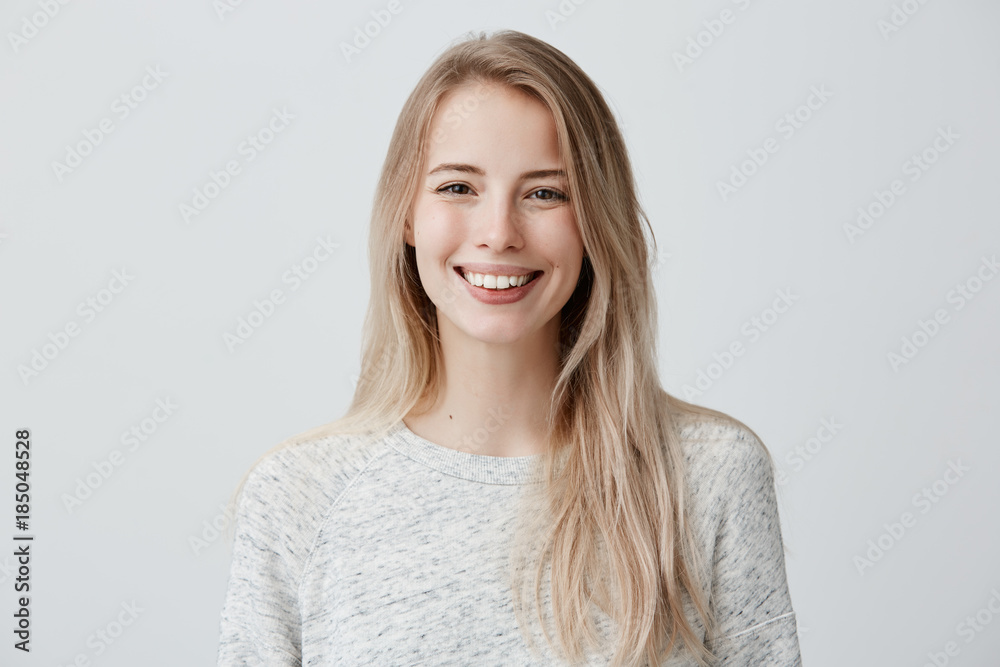

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Prediction probabilities: [[0.57916415 0.42083588]]
Predicted label: 0
The image is a happy face.


In [ ]:
input_image_path = input('Enter the path of the image to be predicted: ')

# Read the input image
input_image = cv2.imread(input_image_path)

# Check if the image was successfully loaded
if input_image is None:
    print("Error: Unable to read the image. Please check the file path.")
else:
    # Display the input image
    from google.colab.patches import cv2_imshow  # Only required in Google Colab
    cv2_imshow(input_image)

    # Preprocess the image: resize, scale, and reshape
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

    # Make a prediction using the model
    input_prediction = model.predict(input_image_reshaped)
    print("Prediction probabilities:", input_prediction)

    # Get the predicted label
    input_pred_label = np.argmax(input_prediction)
    print("Predicted label:", input_pred_label)

    # Output the result based on the predicted label
    if input_pred_label == 0:
        print('The image is a happy face.')
    else:
        print('The image is a sad face.')